Import libraries and set up environment

In [1]:
import sympy
sympy.init_printing()

In this notebook we derive the Jacobi integral, a conserved quantity in the restricted, circular three body problem. The derivation is actually explained quite concisely [here](http://farside.ph.utexas.edu/teaching/336k/Newtonhtml/node121.html), but I feel the algebra is too laborious, so I let the machine grind it.

The Jacobi integral is given by

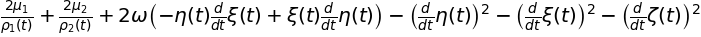

In [63]:
mu_1 = sympy.Symbol('mu_1', positive=True) # Dimensionless gravitational parameter of the first mass
mu_2 = sympy.Symbol('mu_2', positive=True) # Dimensionless gravitational parameter of the second mass
rho_1 = sympy.Function('rho_1') # Dimensionless distance between the first mass and the test particle
rho_2 = sympy.Function('rho_2') # Dimensionless distance between the second mass and the test particle
omega = sympy.Symbol('omega', positive=True) # Rotation frequency
xi = sympy.Function('xi') # First coordinte of the test particle
eta = sympy.Function('eta') # Second coordinate of the test particle
zeta = sympy.Function('zeta') # Third coordinate of the test particle
t = sympy.Symbol('t', positive=True) # Time
jacobi_integral = (2*(mu_1/rho_1(t)+mu_2/rho_2(t))+
                   2*omega*(xi(t)*eta(t).diff(t) - eta(t)*xi(t).diff(t))-
                  (zeta(t).diff(t))**2-(eta(t).diff(t))**2-(xi(t).diff(t))**2)
jacobi_integral

Position of the test particle

In [21]:
pos_t = sympy.Matrix([xi(t),eta(t),zeta(t)])
pos_t

⎡ξ(t)⎤
⎢    ⎥
⎢η(t)⎥
⎢    ⎥
⎣ζ(t)⎦

The position of the first mass is given by

In [24]:
pos_1 = mu_2*sympy.Matrix([-sympy.cos(omega*t), -sympy.sin(omega*t), 0])
pos_1

⎡-μ₂⋅cos(ω⋅t)⎤
⎢            ⎥
⎢-μ₂⋅sin(ω⋅t)⎥
⎢            ⎥
⎣     0      ⎦

The position of the second mass is given by

In [25]:
pos_2 = mu_1*sympy.Matrix([sympy.cos(omega*t), sympy.sin(omega*t), 0])
pos_2

⎡μ₁⋅cos(ω⋅t)⎤
⎢           ⎥
⎢μ₁⋅sin(ω⋅t)⎥
⎢           ⎥
⎣     0     ⎦

The distances between the test particle and the first mass is given by

In [34]:
temp = pos_t - pos_1
rho_1_def = sympy.Eq(rho_1(t)**2,temp.dot(temp))
rho_1_def

The distance between the test particle and the second mass is given by

In [35]:
temp = pos_t - pos_2
rho_2_def = sympy.Eq(rho_2(t)**2, temp.dot(temp))
rho_2_def

Equations of motion for the test particle

In [56]:
accelerations = -mu_1*(pos_t-pos_1)/rho_1(t)**3-mu_2*(pos_t-pos_2)/rho_2(t)**3
accelerations

⎡  μ₁⋅(μ₂⋅cos(ω⋅t) + ξ(t))   μ₂⋅(-μ₁⋅cos(ω⋅t) + ξ(t))⎤
⎢- ─────────────────────── - ────────────────────────⎥
⎢             3                         3            ⎥
⎢           ρ₁ (t)                    ρ₂ (t)         ⎥
⎢                                                    ⎥
⎢  μ₁⋅(μ₂⋅sin(ω⋅t) + η(t))   μ₂⋅(-μ₁⋅sin(ω⋅t) + η(t))⎥
⎢- ─────────────────────── - ────────────────────────⎥
⎢             3                         3            ⎥
⎢           ρ₁ (t)                    ρ₂ (t)         ⎥
⎢                                                    ⎥
⎢                  μ₁⋅ζ(t)   μ₂⋅ζ(t)                 ⎥
⎢                - ─────── - ───────                 ⎥
⎢                     3         3                    ⎥
⎣                   ρ₁ (t)    ρ₂ (t)                 ⎦

Next, we need to prove the Jacobi integral is a constant of the motion

In [64]:
temp = jacobi_integral.diff(t)
temp = temp.subs(sympy.solve(sympy.Eq(rho_1_def.lhs.diff(t), rho_1_def.rhs.diff(t)), rho_1(t).diff(t), dict=True)[0])
temp = temp.subs(sympy.solve(sympy.Eq(rho_2_def.lhs.diff(t), rho_2_def.rhs.diff(t)), rho_2(t).diff(t), dict=True)[0])
temp = temp.subs(xi(t).diff(t,2), accelerations[0])
temp = temp.subs(eta(t).diff(t,2), accelerations[1])
temp = temp.subs(zeta(t).diff(t,2), accelerations[2])
#temp = temp.subs(mu_2, 1-mu_1)
temp.simplify()